In [1]:
import folium
from pandas import DataFrame,read_csv
from numpy import hstack,newaxis,arange
from sklearn.neighbors import DistanceMetric
from geopandas import GeoDataFrame,points_from_xy
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# pack_id = 3496119
data1 = read_csv(r'C:\Users\m.aghili\Desktop\uni_project\LP\a.csv',delimiter='\t')
data2 = {
        'node_type':['dc','point','point','point','point','point','point','point','point','point','point','point','point','point','point','point','point','point','point'],
        'lat':[34.8591			,	34.8316046939023,	34.8228978181196,	34.8080493661635,	34.7994334608297,	34.7828666698494,	34.7906644574943,	34.7819627101561,	34.7675739146376,	34.7671672220595,	34.7742242261959,	34.7829669516897,	34.7853507335572,	34.7953593675638,	34.8069205283399,	34.8196409556211,	34.8071619417396,	34.8173314710403,	34.8367033586498], 
        'lon':[48.533,48.539198448039,48.5512363918378,48.5651911858679,48.5456425703998,48.5414574378181,48.5230141442578,48.5231491280914,48.5269689774552,48.5101138310113,48.4986695275898,48.5098959677305,48.4988854315506,48.4956127251111,48.4910542253773,48.5023152319877,48.5218864337468,48.5162038973198,48.5101496374482]
    }
data3 = {
        'node_type':['dc','point','point','point'],
        'lat':[34.8591,34.8069205283399,34.7864722047018,34.7819627101561], 
        'lon':[48.533,48.4910542253773,48.4866556882875,48.5231491280914]
    }
data3t = {
        'node_type':['dc','point','point','point'],
        'lat':[34.8591,34.7819627101561,34.8069205283399,34.7864722047018], 
        'lon':[48.533,48.5231491280914,48.4910542253773,48.4866556882875]
    }
df = DataFrame(data1) 
df = GeoDataFrame(df, geometry=points_from_xy(df['lon'],df['lat']))
df.crs = "EPSG:4326"

In [ ]:
df

In [217]:
# scipy
from math import radians, cos, sin, asin, sqrt

def haversine(p1, p2):
    
    lon1, lat1, lon2, lat2 = map(radians, [p1[1], p1[0], p2[1], p2[0]])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    return int(2 * asin(sqrt(sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2)) * 6371 * 1000)
m = DataFrame(data3t)[['lat','lon']].to_numpy()
distances = np.zeros((m.shape[0],m.shape[0]))
for i in range(m.shape[0]):
    for j in range(m.shape[0]):
        if i!=j:
            distances[i][j] = haversine(m[i],m[j])
len_dist = distances.shape[0]
distances

c = distances.flatten()
c = np.concatenate((c,np.zeros(distances.shape[0]-1)), axis=0)
c

leq1 = np.zeros((len_dist,distances.shape[0]**2))
f = np.ones(len_dist) - np.eye(len_dist)
for i in range(len_dist):
    leq1[i,i*len_dist:i*len_dist+len_dist] = f[i]
leq1 = np.concatenate((leq1,np.zeros((distances.shape[0],distances.shape[1]-1))), axis=1)
leq1

req1 = np.ones(len_dist)
req1

leq2 = np.zeros((len_dist,distances.shape[0]**2))
f = np.ones(len_dist) - np.eye(len_dist)
for i in range(len_dist):
    f2 = np.zeros(distances.shape)
    f2[i] = f[i] 
    leq2[i] = f2.T.flatten()
leq2 = np.concatenate((leq2,np.zeros((distances.shape[0],distances.shape[1]-1))), axis=1)
leq2

req2 = np.ones(len_dist)
req2

"""
f = np.zeros((distances.shape[0]-1,c.shape[0]))
f2 = np.zeros((distances.shape[0]-1,c.shape[0]))
import itertools
perm_set = itertools.combinations(range(distances.shape[1]-1),2)
k = 0
for i in perm_set:
    f[k,i[0]+distances.shape[0]**2] = 1
    f[k,i[1]+distances.shape[0]**2] = -1
    f[k,i[0]] = 4

    f2[k,i[1]+distances.shape[0]**2] = 1
    f2[k,i[0]+distances.shape[0]**2] = -1
    f[k,i[0]] = 4
    k += 1
f
"""
luneq1 = np.array([
[ 0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  1., -1.,  0.],
[ 0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  1.,  0., -1.],
[ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0.,  0.,  1., -1.],

[ 0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 0.,  0.,  0., -1.,  1.,  0.],
[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0., 0.,  0.,  0., -1.,  0.,  1.],
[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0., 0.,  0.,  0.,  0., -1.,  1.]
])
runeq1 = np.array([3,3,3,3,3,3])

leq = np.concatenate((leq1,leq2), axis=0)
req = np.concatenate((req1,req2), axis=0)

bnd = [(0, 1) for i in range(distances.shape[0]**2)] + [(1,4) for i in range(distances.shape[0]-1)]

from scipy.optimize import linprog

opt = linprog(c=c, A_ub=luneq1, b_ub=runeq1,A_eq=leq, b_eq=req, bounds=bnd, method="revised simplex")

ll = []
for i in range(len(opt.x)-distances.shape[0]-1):
    if opt.x[i]>0:
        ll.append(i)
ll

[2, 4, 7, 8, 11, 13]

records :  101
t_while :  7
t_sf :  686
t_sl :  34643
t_find_best :  278


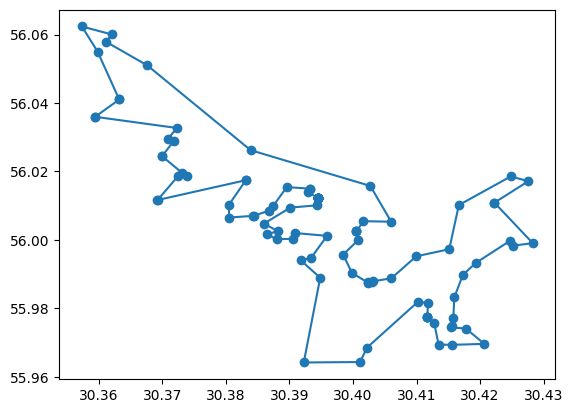

Route: [  0  14  51  96  56  23  16  75  24  42   7  85  41  37  13  48  38  65
  72  31  87  32  66  99   6  84  70  12  78  40  27  63  89  10  91  69
  19  60  47   4  46  26  95  29   8  22  43  62  49  68  55  58  15  57
  97   3  71  17  67  39  21  61  50  94   9  11  45  25  20   1   2  86
  82  73  79  30  53  33  83  81  35  64  59  90  54  74  80  44   5  52
  92  18  88  93  28  98  34  76  36  77 100]

Distance: 45263.0


In [16]:
# two_opt
from math import radians, cos, sin, asin, sqrt
import numpy as np

def haversine(p1, p2):
    
    lon1, lat1, lon2, lat2 = map(radians, [p1[1], p1[0], p2[1], p2[0]])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    return int(2 * asin(sqrt(sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2)) * 6371 * 1000)
# https://stackoverflow.com/questions/25585401/travelling-salesman-in-scipy
# Calculate the euclidian distance in n-space of the route r traversing cities c, ending at the path start.
path_distance = lambda r,c: np.sum([np.linalg.norm(haversine(c[r[p]],c[r[p-1]])) for p in range(len(r))])
# Reverse the order of all elements from element i to element k in array r.
two_opt_swap = lambda r,i,k: np.concatenate((r[0:i],r[k:-len(r)+i-1:-1],r[k+1:len(r)]))

def two_opt(cities,improvement_threshold): # 2-opt Algorithm adapted from https://en.wikipedia.org/wiki/2-opt
    route = np.arange(cities.shape[0]) # Make an array of row numbers corresponding to cities.
    improvement_factor = 1 # Initialize the improvement factor.
    best_distance = path_distance(route,cities) # Calculate the distance of the initial path.
    t_while = 0
    t_sf = 0
    t_sl = 0
    t_find_best = 0
    while improvement_factor > improvement_threshold: # If the route is still improving, keep going!
        t_while += 1
        distance_to_beat = best_distance # Record the distance at the beginning of the loop.
        for swap_first in range(1,len(route)-2): # From each city except the first and last,
            t_sf += 1
            for swap_last in range(swap_first+1,len(route)): # to each of the cities following,
                t_sl += 1
                new_route = two_opt_swap(route,swap_first,swap_last) # try reversing the order of these cities
                new_distance = path_distance(new_route,cities) # and check the total distance with this modification.
                if new_distance < best_distance: # If the path distance is an improvement,
                    t_find_best += 1
                    route = new_route # make this the accepted best route
                    best_distance = new_distance # and update the distance corresponding to this route.
        improvement_factor = 1 - best_distance/distance_to_beat # Calculate how much the route has improved.
    print('records : ',cities.shape[0])
    print('t_while : ',t_while)
    print('t_sf : ',t_sf)
    print('t_sl : ',t_sl)
    print('t_find_best : ',t_find_best)
    return route # When the route is no longer improving substantially, stop searching and return the route.

dc = DataFrame(data1)[['lat','lon']].to_numpy()[0].reshape(1,2)
p = DataFrame(data1)[['lat','lon']].to_numpy()[1:].copy()
np.random.shuffle(p)
cities = np.concatenate((dc, p, dc),axis=0) #np.random.RandomState(42).rand(70,2)
# Find a good route with 2-opt ("route" gives the order in which to travel to each city by row number.)
route = two_opt(cities,0.001)
import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[route[i]] for i in range(len(route))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(route) + "\n\nDistance: " + str(path_distance(route,cities)))

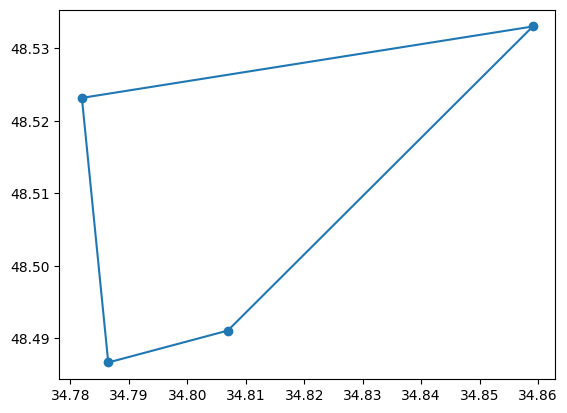

Route: [0, 1, 2, 3, 0]

Distance: 21253.0


In [221]:
# pulp
import pulp


cities = cities[0:-1]
distances = np.zeros((cities.shape[0],cities.shape[0]))
for i in range(cities.shape[0]):
    for j in range(cities.shape[0]):
        if i!=j:
            distances[i][j] = haversine(cities[i],cities[j])
n_point = cities.shape[0]

problem = pulp.LpProblem('CVRP', pulp.LpMinimize)
x = pulp.LpVariable.dicts('x', ((i, j) for i in range(n_point) for j in range(n_point)), lowBound=0, upBound=1, cat='Binary') # edge
u = pulp.LpVariable.dicts('u', (i for i in range(n_point)), lowBound=1, upBound=n_point, cat='Integer') # Nodes
problem += pulp.lpSum(distances[i][j] * x[i, j] for i in range(n_point) for j in range(n_point)) # edge Cost
for i in range(n_point):
    problem += x[i, i] == 0 # there is no ring
for i in range(n_point):
    problem += pulp.lpSum(x[i, j] for j in range(n_point)) == 1 # only one edge comes out from each node
    problem += pulp.lpSum(x[j, i] for j in range(n_point)) == 1 # only one edge enters each node
for i in range(n_point):
    for j in range(n_point):
        if i != j and (i != 0 and j != 0):
            problem += u[i] - u[j] <= n_point * (1 - x[i, j]) - 1
status = problem.solve(pulp.PULP_CBC_CMD(maxSeconds=60))

us_routes_df = DataFrame([[i, j] for i in range(n_point) for j in range(n_point) if pulp.value(x[i, j]) == 1])
routes = [0]
for i in range(len(us_routes_df)):
    routes.append(int(us_routes_df[us_routes_df[0]==routes[-1]][1]))

import matplotlib.pyplot as plt
# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([cities[routes[i]] for i in range(len(routes))]),np.array([cities[0]])))
# Plot the cities.
plt.scatter(cities[:,0],cities[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
# Print the route as row numbers and the total distance travelled by the path.
print("Route: " + str(routes) + "\n\nDistance: " + str(path_distance(routes,cities)))